In [1]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
import pandas as pd
import os
from tqdm.notebook import tqdm
import numpy as np

Test if RNN works with non-square input.

In [2]:
from sklearn.metrics import pairwise_distances

X_train = np.array([[0], [1], [2], [3]])
y_train = np.arange(len(X_train))
print(y_train)
X_test = np.array([[4], [5]])

distances_test = pairwise_distances(X_test, X_train, metric='euclidean')
print(distances_test)

identity = np.identity(len(X_train))

clf = RadiusNeighborsClassifier(radius=1, outlier_label=-1, metric='precomputed')
# clf = KNeighborsClassifier(n_neighbors=1, metric='precomputed')

clf.fit(identity, y_train)
prediction = clf.predict(distances_test)
print(prediction)

[0 1 2 3]
[[4. 3. 2. 1.]
 [5. 4. 3. 2.]]
[ 3 -1]


d:\Murgi\code\memes2024\meme-research-2024\bertopic\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


## Test on IMGFLIP test set

In [41]:
templatebase_path = r'd:\\Murgi\\code\\memes2024\\meme-research-2024/data/processed/templatesbase.parquet'
templatebase = pd.read_parquet(templatebase_path)

meme_df = pd.read_parquet(r'D:\Murgi\code\memes2024\meme-research-2024\data\feature-matching\blurred_meme_df.parquet')
meme_df = meme_df.merge(templatebase, left_on='path', right_on='clean_image_path', how='inner')
meme_df.drop(columns=['clean_image_path'], inplace=True)
meme_df

,id,template_name,path,encoded_label,cpu_paths
0,0-days-without-Lenny-Simpsons_101,0-days-without-lenny-simpsons,D:/Memes2024_blurred/0-days-without-Lenny-Simp...,0,D:/Murgi/templatebase\0-days-without-Lenny-Sim...
1,0-days-without-Lenny-Simpsons_107,0-days-without-lenny-simpsons,D:/Memes2024_blurred/0-days-without-Lenny-Simp...,0,D:/Murgi/templatebase\0-days-without-Lenny-Sim...
2,0-days-without-Lenny-Simpsons_109,0-days-without-lenny-simpsons,D:/Memes2024_blurred/0-days-without-Lenny-Simp...,0,D:/Murgi/templatebase\0-days-without-Lenny-Sim...
3,0-days-without-Lenny-Simpsons_112,0-days-without-lenny-simpsons,D:/Memes2024_blurred/0-days-without-Lenny-Simp...,0,D:/Murgi/templatebase\0-days-without-Lenny-Sim...
4,0-days-without-Lenny-Simpsons_12,0-days-without-lenny-simpsons,D:/Memes2024_blurred/0-days-without-Lenny-Simp...,0,D:/Murgi/templatebase\0-days-without-Lenny-Sim...
...,...,...,...,...,...
33906,Zuckerberg_38,zuckerberg,D:/Memes2024_blurred/Zuckerberg\Zuckerberg_38.jpg,1144,D:/Murgi/templatebase\Zuckerberg_38.jpg
33907,Zuckerberg_39,zuckerberg,D:/Memes2024_blurred/Zuckerberg\Zuckerberg_39.jpg,1144,D:/Murgi/templatebase\Zuckerberg_39.jpg
33908,Zuckerberg_40,zuckerberg,D:/Memes2024_blurred/Zuckerberg\Zuckerberg_40.jpg,1144,D:/Murgi/templatebase\Zuckerberg_40.jpg
33909,Zuckerberg_5,zuckerberg,D:/Memes2024_blurred/Zuckerberg\Zuckerberg_5.jpg,1144,D:/Murgi/templatebase\Zuckerberg_5.jpg


In [42]:
X,y = meme_df['cpu_paths'], meme_df['template_name']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(27128,) (6783,)


In [31]:
dfs = []

for file in os.listdir('./imgflip-agg-dists/'):
    df = pd.read_parquet(f'./imgflip-agg-dists/{file}')
    dfs.append(df)
    print(file)

df = pd.concat(dfs)
df = df.reindex(sorted(df.columns), axis=1)
# check if there are duplicates in the index
df = df[~df.index.duplicated(keep='first')]
df



agg-dists-0.parquet
agg-dists-1.parquet
agg-dists-2.parquet
agg-dists-3.parquet
agg-dists-4.parquet
agg-dists-5.parquet


,0-days-without-Lenny-Simpsons_107,0-days-without-Lenny-Simpsons_109,0-days-without-Lenny-Simpsons_112,0-days-without-Lenny-Simpsons_13,0-days-without-Lenny-Simpsons_3,0-days-without-Lenny-Simpsons_31,0-days-without-Lenny-Simpsons_33,0-days-without-Lenny-Simpsons_35,0-days-without-Lenny-Simpsons_37,0-days-without-Lenny-Simpsons_39,...,you-merely-adopted-x-i-was-born-in-itmolded-by-it-87,you-merely-adopted-x-i-was-born-in-itmolded-by-it-9,you-the-real-mvp-2,you-took-everything-from-me---i-dont-even-know-who-you-are,you-underestimate-my-power,you-were-the-chosen-one-star-wars,you-wouldnt-get-it,young-cardi-b,your-country-needs-you,zuckerberg
23-wolves-laugh-93,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3-Spiderman-Pointing_11,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3-Spiderman-Pointing_57,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
a-ustedes-les-pagan-42,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Aaaaand-Its-Gone_20,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
But-Not-because-Im-Black_63,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Knights-of-the-Round-Table_78,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Alright-Gentlemen-We-Need-A-New-Idea_19,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
TED_88,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [33]:
#name the column to 'cpu_paths'
test_df = X_test.to_frame().reset_index(drop=True)
test_df = test_df.merge(meme_df[['template_name','id','cpu_paths']], left_on='cpu_paths', right_on='cpu_paths', how='inner')
test_df

,cpu_paths,template_name,id
0,D:/Murgi/templatebase\Joe-Biden-worries_16.jpg,joe-biden-worries,Joe-Biden-worries_16
1,D:/Murgi/templatebase\Consuela_90.jpg,consuela,Consuela_90
2,D:/Murgi/templatebase\Look-how-they-massacred-...,look-how-they-massacred-my-boy,Look-how-they-massacred-my-boy_53
3,D:/Murgi/templatebase\Its-Time-To-Start-Asking...,its-time-to-start-asking-yourself-the-big-ques...,Its-Time-To-Start-Asking-Yourself-The-Big-Ques...
4,D:/Murgi/templatebase\Bad-Joke-Eel_38.jpg,bad-joke-eel,Bad-Joke-Eel_38
...,...,...,...
6778,D:/Murgi/templatebase\spongebob-happy-and-sad_...,spongebob-happy-and-sad,spongebob-happy-and-sad_32
6779,D:/Murgi/templatebase\Power-Ranger-Teletubbies...,power-ranger-teletubbies,Power-Ranger-Teletubbies_75
6780,D:/Murgi/templatebase\Call-an-ambulance-but-no...,call-an-ambulance-but-not-for-me,Call-an-ambulance-but-not-for-me_68
6781,D:/Murgi/templatebase\Manning-Broncos_33.jpg,manning-broncos,Manning-Broncos_33


In [38]:
test_df.sort_values(by='id', inplace=True)
# sort df by index
df.sort_index(inplace=True)

# check if the index is the same as the id
if all(df.index == test_df['id']):
    print('index is the same as id')

index is the same as id


In [62]:
y_test = test_df['template_name']
y_test

5796                        0-days-without-lenny-simpsons
2345                        0-days-without-lenny-simpsons
1223                        0-days-without-lenny-simpsons
3683                        0-days-without-lenny-simpsons
6192                        0-days-without-lenny-simpsons
                              ...                        
1607    you-merely-adopted-x-i-was-born-in-itmolded-by-it
6099    you-merely-adopted-x-i-was-born-in-itmolded-by-it
25      you-merely-adopted-x-i-was-born-in-itmolded-by-it
1068    you-merely-adopted-x-i-was-born-in-itmolded-by-it
6590    you-merely-adopted-x-i-was-born-in-itmolded-by-it
Name: template_name, Length: 6783, dtype: object

Inf or a very big number does not matter as long as the number is higher than 27, becasue that's the radius we will use.

In [44]:
distance_matrix = df.to_numpy()
distance_matrix
# replace inf with 9999
distance_matrix = np.where(np.isinf(distance_matrix), 9999, distance_matrix)
distance_matrix

array([[0.000e+00, 2.000e+00, 0.000e+00, ..., 9.999e+03, 9.999e+03,
        9.999e+03],
       [0.000e+00, 4.000e+00, 0.000e+00, ..., 9.999e+03, 9.999e+03,
        9.999e+03],
       [0.000e+00, 2.000e+00, 0.000e+00, ..., 9.999e+03, 9.999e+03,
        9.999e+03],
       ...,
       [9.999e+03, 9.999e+03, 9.999e+03, ..., 9.999e+03, 9.999e+03,
        9.999e+03],
       [9.999e+03, 9.999e+03, 9.999e+03, ..., 9.999e+03, 9.999e+03,
        9.999e+03],
       [9.999e+03, 9.999e+03, 9.999e+03, ..., 9.999e+03, 9.999e+03,
        9.999e+03]])

In [45]:
meme_df = pd.read_parquet(r'D:\Murgi\code\memes2024\meme-research-2024\data\feature-matching\blurred_meme_df.parquet')
X_train = meme_df.loc[meme_df['id'].isin(df.columns)].sort_values('id')
y_train = X_train['template_name']
y_train

4             0-days-without-lenny-simpsons
5             0-days-without-lenny-simpsons
9             0-days-without-lenny-simpsons
11            0-days-without-lenny-simpsons
26            0-days-without-lenny-simpsons
                        ...                
107393    you-were-the-chosen-one-star-wars
107454                   you-wouldnt-get-it
107496                        young-cardi-b
107557               your-country-needs-you
107833                           zuckerberg
Name: template_name, Length: 27126, dtype: object

In [46]:
identity = np.identity(len(df.columns))
identity.shape

(27126, 27126)

In [49]:
rnn = RadiusNeighborsClassifier(radius=27.1, outlier_label='templateless', weights='distance', metric='precomputed')

rnn.fit(identity, y_train)

prediction = rnn.predict(distance_matrix)
print(prediction)

['0-days-without-lenny-simpsons' '0-days-without-lenny-simpsons'
 '0-days-without-lenny-simpsons' ...
 'you-merely-adopted-x-i-was-born-in-itmolded-by-it'
 'you-merely-adopted-x-i-was-born-in-itmolded-by-it'
 'you-merely-adopted-x-i-was-born-in-itmolded-by-it']


d:\Murgi\code\memes2024\meme-research-2024\bertopic\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label templateless is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


In [51]:
y_pred_binary = [0 if pred == 'templateless' else 1 for pred in prediction]
y_pred_binary[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
y_test_binary = [0 if pred == 'templateless' else 1 for pred in y_test]
y_test_binary

d:\Murgi\code\memes2024\meme-research-2024\bertopic\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Murgi\code\memes2024\meme-research-2024\bertopic\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Murgi\code\memes2024\meme-research-2024\bertopic\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99      6783

    accuracy                           0.98      6783
   macro avg       0.50      0.49      0.49      6783
weighted avg       1.00      0.98      0.99      6783



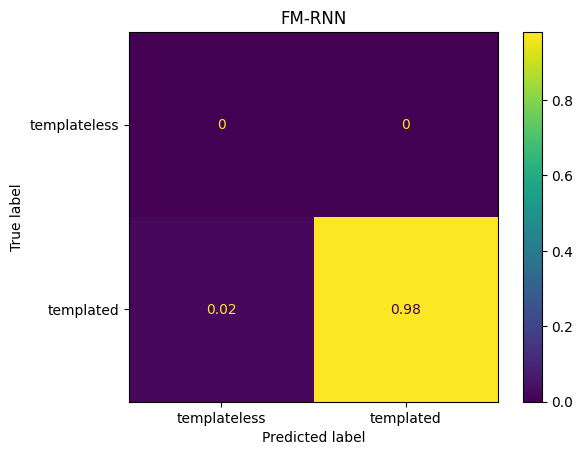

In [56]:
from sklearn.metrics import classification_report
# import confusion_matrix_pretty_print
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import json 

print(classification_report(y_test_binary, y_pred_binary))
report = classification_report(y_test_binary, y_pred_binary, output_dict=True)
with open(r"D:\Murgi\code\memes2024\meme-research-2024\reports\fm-rnn/imgflip-test-80-20.json", "w") as f:
    json.dump(report, f, indent=4)

cm = confusion_matrix(y_test_binary, y_pred_binary, normalize="all")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['templateless', 'templated'])
disp.plot()
plt.title("FM-RNN")
plt.show()

In [58]:
prediction

array(['0-days-without-lenny-simpsons', '0-days-without-lenny-simpsons',
       '0-days-without-lenny-simpsons', ...,
       'you-merely-adopted-x-i-was-born-in-itmolded-by-it',
       'you-merely-adopted-x-i-was-born-in-itmolded-by-it',
       'you-merely-adopted-x-i-was-born-in-itmolded-by-it'], dtype=object)

In [64]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, cohen_kappa_score

acc = accuracy_score(y_test, prediction)
mcc = matthews_corrcoef(y_test, prediction)
f1 = f1_score(y_test, prediction, average='weighted')
kappa = cohen_kappa_score(y_test, prediction)
print("Acc: ", acc)
print("MCC: ", mcc)
print("F1: ", f1)
print("Kappa: ", kappa)

multi_class_scores = {
    "accuracy": acc,
    "mcc": mcc,
    "f1": f1,
    "kappa": kappa
}

with open(r"D:\Murgi\code\memes2024\meme-research-2024\reports\fm-rnn/imgflip-test-80-20-multi-class.json", "w") as f:
    json.dump(multi_class_scores, f, indent=4)

Acc:  0.9753796255344243
MCC:  0.975562690946168
F1:  0.9821763494015285
Kappa:  0.9753556507839883


## Test on Social Media test set

In [83]:
dfs = []

for file in os.listdir('./sm-agg-dists/'):
    df = pd.read_parquet(f'./sm-agg-dists/{file}')
    dfs.append(df)
    print(len(df))

df = pd.concat(dfs)
df = df.reindex(sorted(df.columns), axis=1)
df.sort_index(inplace=True)
df


270
330
398


,0-days-without-Lenny-Simpsons_107,0-days-without-Lenny-Simpsons_109,0-days-without-Lenny-Simpsons_112,0-days-without-Lenny-Simpsons_13,0-days-without-Lenny-Simpsons_3,0-days-without-Lenny-Simpsons_31,0-days-without-Lenny-Simpsons_33,0-days-without-Lenny-Simpsons_35,0-days-without-Lenny-Simpsons_37,0-days-without-Lenny-Simpsons_39,...,you-merely-adopted-x-i-was-born-in-itmolded-by-it-87,you-merely-adopted-x-i-was-born-in-itmolded-by-it-9,you-the-real-mvp-2,you-took-everything-from-me---i-dont-even-know-who-you-are,you-underestimate-my-power,you-were-the-chosen-one-star-wars,you-wouldnt-get-it,young-cardi-b,your-country-needs-you,zuckerberg
149781103607370_added-7706,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2018_12-10375,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2018_12-11534,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2018_12-12778,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2018_12-18978,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
coronavirus-7244,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
imemeit_added-15546,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
imemeit_added-16353,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
verynicememethanks_added-47232,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [82]:
sm_df = pd.read_parquet(r'D:\Murgi\code\meme-evaluator\v3\holy_grail_all.parquet')
sm_df.sort_values('image_id', inplace=True)
sm_df = sm_df[sm_df['image_id'].isin(df.index)]
sm_df


,image_id,template_true,binary_true_encoded,sparse_prediction,phash_prediction,cnn_prediction,rnn_prediction,touch_prediction,touch_binary,sparse_binary,phash_binary,cnn_binary,rnn_binary,special_case,path
670,149781103607370_added-7706,case1 - kylo,1,oh-no,templateless,keep-calm-and-carry-on-purple,templateless,templateless,0.0,1.0,0.0,1.0,0.0,True,D:/Murgi/Facebook2023/Facebook2023/14978110360...
671,2018_12-10375,templateless,0,tf2-heavy-i-fear-no-man,templateless,templateless,templateless,templateless,0.0,1.0,0.0,0.0,0.0,False,D:/Murgi/Twitter2023/2018_12-10375.jpg
672,2018_12-11534,templateless,0,templateless,templateless,templateless,templateless,kobe,1.0,0.0,0.0,0.0,0.0,False,D:/Murgi/Twitter2023/2018_12-11534.jpg
673,2018_12-12778,templateless,0,templateless,templateless,templateless,laughing-goat,happy-squirrel,1.0,0.0,0.0,0.0,1.0,False,D:/Murgi/Twitter2023/2018_12-12778.jpg
674,2018_12-18978,templateless,0,templateless,templateless,black-scientist-finally-xium,templateless,templateless,0.0,0.0,0.0,1.0,0.0,False,D:/Murgi/Twitter2023/2018_12-18978.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,coronavirus-7244,templateless,0,templateless,templateless,templateless,templateless,templateless,0.0,0.0,0.0,0.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/coronavirus...
996,imemeit_added-15546,templateless,0,templateless,templateless,templateless,templateless,templateless,0.0,0.0,0.0,0.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/imemeit_add...
997,imemeit_added-16353,templateless,0,templateless,templateless,keep-calm-and-carry-on-purple,templateless,templateless,0.0,0.0,0.0,1.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/imemeit_add...
998,verynicememethanks_added-47232,templateless,0,templateless,templateless,wanted-poster,templateless,templateless,0.0,0.0,0.0,1.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/verynicemem...


In [84]:
y_test = sm_df['template_true']
y_test_binary = sm_df['binary_true_encoded']

In [86]:
distance_matrix = df.to_numpy()
distance_matrix
# replace inf with 9999
distance_matrix = np.where(np.isinf(distance_matrix), 9999, distance_matrix)
distance_matrix.shape

(998, 27126)

In [87]:
meme_df = pd.read_parquet(r'D:\Murgi\code\memes2024\meme-research-2024\data\feature-matching\blurred_meme_df.parquet')
X_train = meme_df.loc[meme_df['id'].isin(df.columns)].sort_values('id')
y_train = X_train['template_name']
y_train

4             0-days-without-lenny-simpsons
5             0-days-without-lenny-simpsons
9             0-days-without-lenny-simpsons
11            0-days-without-lenny-simpsons
26            0-days-without-lenny-simpsons
                        ...                
107393    you-were-the-chosen-one-star-wars
107454                   you-wouldnt-get-it
107496                        young-cardi-b
107557               your-country-needs-you
107833                           zuckerberg
Name: template_name, Length: 27126, dtype: object

In [88]:
identity = np.identity(len(df.columns))
identity.shape

(27126, 27126)

In [89]:
rnn = RadiusNeighborsClassifier(radius=27.1, outlier_label='templateless', weights='distance', metric='precomputed')

rnn.fit(identity, y_train)

y_pred = rnn.predict(distance_matrix)
print(y_pred)

['templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'templateless' 'creepy-condescending-wonka'
 'templateless' 'templateless' 'change-my-mind' 'be-like-bill'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'la-noire-press-x-to-doubt' 'templateless'
 'templateless' 'templateless' 'second-breakfast' 'templateless'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'templateless' 'templateless' 'templateless'
 'templateless' 'woman-yelling-at-cat' 'templateless' 'templateless'
 'templateless' 'templateless' 'mom-can-we-have' 'templateless'
 'templateless' 'templateless' 'templatel

d:\Murgi\code\memes2024\meme-research-2024\bertopic\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label templateless is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


In [ ]:
y_pred_binary = [0 if pred == 'templateless' else 1 for pred in y_pred]
y_pred_binary

In [97]:
len(y_pred), len(y_pred_binary), len(sm_df)

(998, 998, 998)

In [98]:
sm_df['fm-rnn_prediction'] = y_pred
sm_df['fm-rnn_prediction_binary'] = y_pred_binary
sm_df

,image_id,template_true,binary_true_encoded,sparse_prediction,phash_prediction,cnn_prediction,rnn_prediction,touch_prediction,touch_binary,sparse_binary,phash_binary,cnn_binary,rnn_binary,special_case,path,fm-rnn_prediction,fm-rnn_prediction_binary
670,149781103607370_added-7706,case1 - kylo,1,oh-no,templateless,keep-calm-and-carry-on-purple,templateless,templateless,0.0,1.0,0.0,1.0,0.0,True,D:/Murgi/Facebook2023/Facebook2023/14978110360...,templateless,0
671,2018_12-10375,templateless,0,tf2-heavy-i-fear-no-man,templateless,templateless,templateless,templateless,0.0,1.0,0.0,0.0,0.0,False,D:/Murgi/Twitter2023/2018_12-10375.jpg,templateless,0
672,2018_12-11534,templateless,0,templateless,templateless,templateless,templateless,kobe,1.0,0.0,0.0,0.0,0.0,False,D:/Murgi/Twitter2023/2018_12-11534.jpg,templateless,0
673,2018_12-12778,templateless,0,templateless,templateless,templateless,laughing-goat,happy-squirrel,1.0,0.0,0.0,0.0,1.0,False,D:/Murgi/Twitter2023/2018_12-12778.jpg,templateless,0
674,2018_12-18978,templateless,0,templateless,templateless,black-scientist-finally-xium,templateless,templateless,0.0,0.0,0.0,1.0,0.0,False,D:/Murgi/Twitter2023/2018_12-18978.jpg,templateless,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,coronavirus-7244,templateless,0,templateless,templateless,templateless,templateless,templateless,0.0,0.0,0.0,0.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/coronavirus...,templateless,0
996,imemeit_added-15546,templateless,0,templateless,templateless,templateless,templateless,templateless,0.0,0.0,0.0,0.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/imemeit_add...,templateless,0
997,imemeit_added-16353,templateless,0,templateless,templateless,keep-calm-and-carry-on-purple,templateless,templateless,0.0,0.0,0.0,1.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/imemeit_add...,templateless,0
998,verynicememethanks_added-47232,templateless,0,templateless,templateless,wanted-poster,templateless,templateless,0.0,0.0,0.0,1.0,0.0,False,D:/Murgi/Facebook2023/Facebook2023/verynicemem...,templateless,0


              precision    recall  f1-score   support

           0       0.91      0.86      0.89       751
           1       0.64      0.75      0.69       247

    accuracy                           0.83       998
   macro avg       0.78      0.81      0.79       998
weighted avg       0.85      0.83      0.84       998



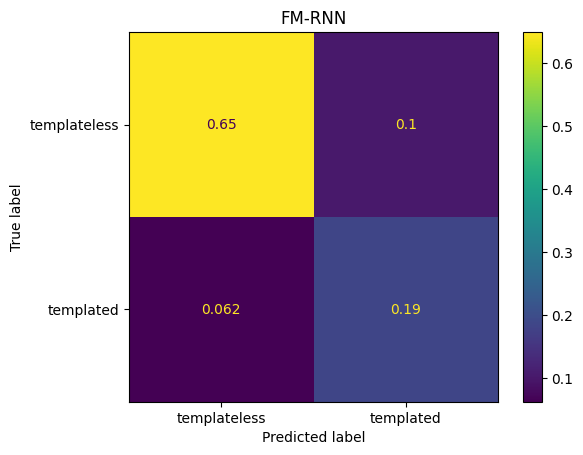

In [103]:
from sklearn.metrics import classification_report
# import confusion_matrix_pretty_print
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import json 

print(classification_report(y_test_binary, y_pred_binary))
report = classification_report(y_test_binary, y_pred_binary, output_dict=True)
with open(f"D:\Murgi\code\memes2024\meme-research-2024/reports/binary-reports/1000-binary-report-fm_rnn.json", "w") as f:
    json.dump(report, f, indent=4)

cm = confusion_matrix(y_test_binary, y_pred_binary, normalize="all")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['templateless', 'templated'])
disp.plot()
plt.title("FM-RNN")
plt.show()

# Check the accuracy on memes that WE thought are templated

In [99]:
sm_df_true_templated = sm_df[sm_df['binary_true_encoded'] == 1]
sm_df_true_templated

,image_id,template_true,binary_true_encoded,sparse_prediction,phash_prediction,cnn_prediction,rnn_prediction,touch_prediction,touch_binary,sparse_binary,phash_binary,cnn_binary,rnn_binary,special_case,path,fm-rnn_prediction,fm-rnn_prediction_binary
670,149781103607370_added-7706,case1 - kylo,1,oh-no,templateless,keep-calm-and-carry-on-purple,templateless,templateless,0.0,1.0,0.0,1.0,0.0,True,D:/Murgi/Facebook2023/Facebook2023/14978110360...,templateless,0
677,2018_12-20615,creepy-condescending-wonka,1,templateless,creepy-condescending-wonka,creepy-condescending-wonka,creepy-condescending-wonka,templateless,0.0,0.0,1.0,1.0,1.0,False,D:/Murgi/Twitter2023/2018_12-20615.jpg,creepy-condescending-wonka,1
680,2018_12-23623,change-my-mind,1,change-my-mind,change-my-mind,change-my-mind,change-my-mind,change-my-mind,1.0,1.0,1.0,1.0,1.0,False,D:/Murgi/Twitter2023/2018_12-23623.jpg,change-my-mind,1
682,2018_12-29202,donald-trump-approves,1,templateless,templateless,donald-trump-approves,templateless,donald-trump-approves,1.0,0.0,0.0,1.0,0.0,False,D:/Murgi/Twitter2023/2018_12-29202.jpg,templateless,0
705,2019_12-13011,case1 - drake and josh,1,anakin-kills-younglings,templateless,black-girl-wat,templateless,templateless,1.0,1.0,0.0,1.0,0.0,True,D:/Murgi/Twitter2023/2019_12-13011.jpg,templateless,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,444169716245436_added-13861,case1,1,maybe-i-am-a-monster,templateless,mom-can-we-have,templateless,im-about-to-end-this-mans-whole-career,1.0,1.0,0.0,1.0,0.0,True,D:/Murgi/Facebook2023/Facebook2023/44416971624...,templateless,0
986,DankMagicMemes_added-10534,case1-spray kid,1,templateless,templateless,crying-wojak-vs-chad,templateless,templateless,0.0,0.0,0.0,1.0,0.0,True,D:/Murgi/Facebook2023/Facebook2023/DankMagicMe...,templateless,0
989,DankMagicMemes_added-13013,case1,1,black-girl-wat,templateless,inception,templateless,templateless,0.0,1.0,0.0,1.0,0.0,True,D:/Murgi/Facebook2023/Facebook2023/DankMagicMe...,disappearing,1
990,DankMagicMemes_added-13308,case1,1,matrix-morpheus-offer,templateless,oliver-twist-please-sir,liam-neeson-taken,pippin-second-breakfast,1.0,1.0,0.0,1.0,1.0,True,D:/Murgi/Facebook2023/Facebook2023/DankMagicMe...,templateless,0


In [101]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, cohen_kappa_score

def calc_acc_for_templated_memes(df,model_name:str):
    temp = df
    y_true = temp['template_true'].values
    y_pred = temp[f"{model_name}_prediction"].values
    acc = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_true, y_pred)
    return {'accuracy': acc, 'mcc': mcc, 'f1': f1, 'kappa': kappa}

print("Accuracy for templated memes without templateless")
print(calc_acc_for_templated_memes(sm_df_true_templated,"fm-rnn"))

print("Accuracy for all memes including templateless")
print(calc_acc_for_templated_memes(sm_df,"fm-rnn"))

Accuracy for templated memes without templateless
{'accuracy': 0.6072874493927125, 'mcc': 0.6290700250194617, 'f1': 0.6376004112846219, 'kappa': 0.6049954661610748}
Accuracy for all memes including templateless
{'accuracy': 0.7995991983967936, 'mcc': 0.5714201923393618, 'f1': 0.8243207480114562, 'kappa': 0.5683605703003527}


# Check the accuracy on memes that the MODELS thought are templated

In [102]:
def calc_accuracy_on_model_templated(temp, model_name):
    temp = temp[temp[f"{model_name}_prediction"] != 'templateless']
    y_true = temp['template_true'].values
    y_pred = temp[f"{model_name}_prediction"].values
    acc = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_true, y_pred)
    return {'accuracy': acc, 'mcc': mcc, 'f1': f1, 'kappa': kappa}


print('Accuracy on only templated memes (defined by models):')
print(calc_accuracy_on_model_templated(sm_df,"fm-rnn"))

Accuracy on only templated memes (defined by models):
{'accuracy': 0.5208333333333334, 'mcc': 0.5582610889919151, 'f1': 0.526277387735721, 'kappa': 0.5189717148977888}


In [105]:

all_memes_true_templated = calc_acc_for_templated_memes(sm_df,"fm-rnn")
only_templated_true_templated = calc_acc_for_templated_memes(sm_df_true_templated,"fm-rnn")
only_templated_model_templates = calc_accuracy_on_model_templated(sm_df,"fm-rnn")
multiclass_accs = {
    "all_memes_true_templated": all_memes_true_templated,
    "only_templated_true_templated": only_templated_true_templated,
    "only_templated_model_templates": only_templated_model_templates
}
with open(f"D:\Murgi\code\memes2024\meme-research-2024/reports\multiclass-reports/1000-multiclass-report-fm_rnn.json", "w") as f:
    json.dump(multiclass_accs, f, indent=4)